# Vertical Line Test

In [0]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
plt.rcParams.update({'font.size':14})

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

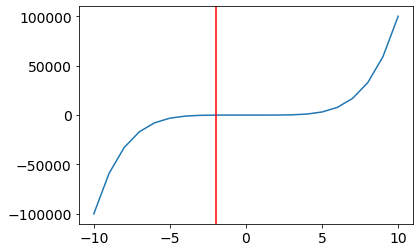

In [7]:
x = np.arange(-10,11)
y = x**5 + .5*x
plt.plot(x,y)
plt.axvline(x=-2, color='r');

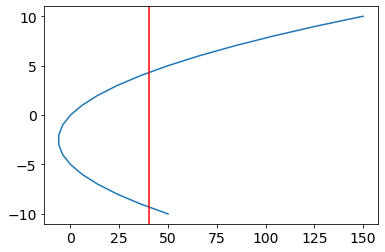

In [11]:
y = np.arange(-10,11)
x = y**2 + 5*y
plt.plot(x,y)
plt.axvline(x=40, color='r');

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

They are not considered true functions because when you input a value of x there are times when there are 2 or more possible solutions to what y is and we don't like that when working with functions.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relations 1 and 2 are functions because neither of them have repeated values for x among their 3 pairs. While the other 3 relations do.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

The input for m is $\mathbb{R}^3$ and the output is also $\mathbb{R}^3$

The input for n is $\mathbb{R}^4$ and the output is $\mathbb{R}^2$

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

After looking online, it looks like you can do that but from what I read it often ends up just overfittering the data too much. 

I was able to find the example below:
\begin{align}
f(a𝑥_1)=a(x_1,x_1)
\end{align}

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

####Function p

In [0]:
# define the function
def p(vect):
  x1=vect[0][0]
  x2=vect[1][0]
  output_row1=np.array([x1 + 3*x2])
  output_row2=np.array([2*x2 - x1])
  output_vector=np.array([output_row1,output_row2])
  return output_vector

In [0]:
# input i and j unit vectors
i_hat=np.array([[1],[0]])
j_hat=np.array([[0],[1]])
a=p(i_hat)
b=p(j_hat)

In [14]:
# turn those into a matrix and show as a data frame
T = np.column_stack([a,b])
pd.DataFrame(T)

,0,1
0,1,3
1,-1,2


#### Function q

In [0]:
# define the function
def q(vect):
  x1=vect[0][0]
  x2=vect[1][0]
  x3=vect[2][0]
  output_row1=([4*x1 + x2+ 2*x3])
  output_row2=([2*x2 - x1 + 3*x3])
  output_row3=([5*x1 - 2*x3 + x2])
  output_vector=np.array([output_row1,output_row2,output_row3])
  return output_vector

In [0]:
# apply q to x y and z unit vectors
i_hat=np.array([[1],[0],[0]])
j_hat=np.array([[0],[1],[0]])
k_hat=np.array([[0],[0],[1]])

a =q(i_hat)
b =q(j_hat)
c =q(k_hat)

In [29]:
# turn those into a matrix and show as a data frame
T = np.column_stack([a,b,c])
pd.DataFrame(T)

,0,1,2
0,4,1,2
1,-1,2,3
2,5,1,-2


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

####p

In [16]:
# test with original function
input_vector=np.array([[2],[5]])
p(input_vector)

array([[17],
       [ 8]])

In [17]:
# then with matrix multiplication
output_vector=np.matmul(T,input_vector)
output_vector

array([[17],
       [ 8]])

####q

In [30]:
# test with original function
input_vector=np.array([[2],[5],[7]])
q(input_vector)

array([[27],
       [29],
       [ 1]])

In [31]:
# then with matrix multiplication
output_vector=np.matmul(T,input_vector)
output_vector

array([[27],
       [29],
       [ 1]])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are the vectors in a multidimentional space that when the data is transformed these vectors do not change their orientation.

An Eginvalue is the scalar that represents by how much the eigenvector was scaled by during the transformation.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

- Higher dimensionality give more vibrancy to the data, but it harder to conceptualize and find meaningful connections in.
-But lower dimensionality often makes the data less rich, but is easier to work with.
- The more data features there are the smaller the reutrns are for having each additional feature.
- Increased sparcity of data witch often leads to a loss of meaning

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should have at least 5 times the number of observations as you have parameters in your model.

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [39]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [40]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL            object
AGE1                int64
METRO3             object
REGION             object
LMED                int64
                    ...  
FMTINCRELAMICAT    object
FMTASSISTED        object
FMTBURDEN          object
FMTREGION          object
FMTSTATUS          object
Length: 99, dtype: object

In [41]:
# check for null values
national.isnull().sum().any()

False

In [42]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [43]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL            category
AGE1                  int64
METRO3             category
REGION             category
LMED                  int64
                     ...   
FMTINCRELAMICAT    category
FMTASSISTED        category
FMTBURDEN          category
FMTREGION          category
FMTSTATUS          category
Length: 99, dtype: object

In [44]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0,0


In [45]:
# Now we only have numeric columns (ints and floats)
national_processed.dtypes

CONTROL            int32
AGE1               int64
METRO3              int8
REGION              int8
LMED               int64
                   ...  
FMTINCRELAMICAT     int8
FMTASSISTED         int8
FMTBURDEN           int8
FMTREGION           int8
FMTSTATUS           int8
Length: 99, dtype: object

In [70]:
### Your Code Here

# Standardize the data
from sklearn.preprocessing import StandardScaler
feature_cols=national_processed.columns
feature_cols[:5]


Index(['CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED'], dtype='object')

In [0]:
# normalize the features
x = national_processed.loc[:,feature_cols].values
x = StandardScaler().fit_transform(x)

In [72]:
# verify the data is normalized
print('{:.2f}'.format(np.mean(x)))
print('{:.2f}'.format(np.std(x)))

0.00
0.99


In [73]:
# convert the normalized features into a dataframe
normal_national=pd.DataFrame(x,columns=feature_cols)
normal_national.sample(5)

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
21128,-0.597918,0.744717,0.608784,-1.327872,0.454953,0.100490,0.565092,0.565140,0.529149,0.288565,0.310570,0.135610,-0.271749,-0.142292,-0.289258,-0.26814,-0.518234,-0.253701,-0.331426,0.651020,0.434080,0.152788,-0.001189,-0.629782,-0.626460,-0.858681,-0.059663,0.392552,-0.454611,-0.399782,-0.432735,-0.473572,0.371708,-0.774303,0.454953,0.565092,0.565140,0.529149,0.629173,0.518774,...,0.144074,-0.526163,-0.588115,-0.481295,-0.683751,-0.388147,0.43258,-0.475370,-0.685212,-0.583311,-0.896546,-0.448208,0.167739,-0.583663,-0.452728,-0.001189,-0.706647,-0.163371,-0.62717,0.388888,-0.858681,-0.080937,-0.110391,0.615731,-0.052382,0.778350,-0.518776,-0.588115,-0.685212,-0.452728,0.926091,-0.956874,-1.028145,-0.683751,-0.896546,0.781683,-0.709278,-0.544709,-0.462107,0.0
59680,1.471472,0.132539,-0.966702,1.528983,2.674807,0.656164,1.010434,1.004322,1.211634,-0.551505,-1.517969,-1.765204,-0.271749,-0.142292,-0.570378,-0.26814,1.097899,-0.052772,-1.906628,-0.017540,-0.345248,-0.287023,-0.001189,0.153101,0.733971,1.164576,-1.314446,-0.466394,-0.187566,-0.331955,-0.247850,-0.131866,-0.693001,1.226057,2.674807,1.010434,1.004322,1.211634,0.850556,0.606592,...,0.448213,-0.411853,-0.588115,-0.405347,-0.228305,-0.119132,0.43258,-0.480500,-0.685212,-0.223664,0.115986,0.210640,0.472927,-0.313350,-0.452728,-0.001189,1.415134,-1.424661,0.73439,-1.613416,1.164576,0.676610,0.649838,0.615731,0.703541,0.778350,-0.518776,-0.588115,-0.685212,-0.452728,-0.082759,0.024966,-0.077478,-0.228305,0.115986,-0.388919,0.773833,0.549473,2.164001,0.0
40793,0.457658,0.875897,-0.178959,-1.327872,1.472325,0.432880,0.234801,0.231805,-0.059167,-0.677412,-0.603700,-0.624715,-0.271749,-0.142292,-0.570378,-0.26814,1.097899,-0.253701,-0.856494,-1.095230,-0.345248,-0.686728,-0.001189,-0.250048,-0.626460,1.164576,-0.899599,-0.466394,-0.424434,-0.484445,-0.450159,-0.399841,-0.693001,1.226057,1.472325,0.234801,0.231805,-0.059167,0.335496,0.675461,...,0.448213,-0.600586,-0.588115,-0.574022,-1.139197,-0.288174,0.43258,-0.623491,-0.685212,-0.514924,-0.896546,-0.081520,0.472927,-0.559144,-0.452728,-0.001189,-0.706647,-0.794016,-0.62717,-0.612264,1.164576,0.676610,0.649838,0.615731,0.703541,-1.342644,-0.518776,-0.588115,-0.685212,-0.452728,-1.091609,-0.956874,-1.028145,-1.139197,-0.896546,-1.169320,0.773833,1.643655,-0.462107,0.0
13946,-0.983432,0.875897,-0.966702,0.576698,-0.575434,0.016759,-0.655433,-0.659250,-0.637803,-0.280162,1.224839,-1.765204,-0.271749,-0.142292,2.240599,-0.26814,-0.518234,-0.253701,1.243775,0.611772,0.044416,0.056383,-0.001189,2.335807,-0.626460,-0.858681,1.712398,1.251498,2.262563,2.286267,2.276772,2.244125,-0.075778,-0.774303,-0.575434,-0.655433,-0.659250,-0.637803,-0.239947,0.118365,...,0.448213,3.043907,0.796007,2.596550,1.138032,2.795547,0.43258,3.080911,0.716067,2.483046,1.634783,2.739029,0.472927,2.938563,0.923669,-0.001189,1.415134,-1.424661,-0.62717,1.390040,-0.858681,0.676610,0.649838,0.615731,0.703541,0.778350,0.859820,0.796007,0.716067,0.923669,0.926091,1.497727,1.348523,1.138032,1.634783,1.171883,-0.709278,1.643655,-0.462107,0.0
41918,0.518045,-0.042368,2.184270,0.57

In [0]:
# Import the PCA module
from sklearn.decomposition import PCA

In [0]:
# instantiate the sklearn class & pass the desired number of components 
pca_national = PCA(n_components=2)

In [0]:
# call fit_transform on the aggregate data
pca_data = pca_national.fit_transform(x)

In [77]:
# compare col and rows
print(national_processed.shape)
print(pca_data.shape)

(64535, 99)
(64535, 2)


In [78]:
# create a data frame with the principal components
national_pca=pd.DataFrame(data=pca_data, columns=['comp_1', 'comp_2'])
national_pca.head()

,comp_1,comp_2
0,-2.576570,-1.376127
1,2.040643,-0.988061
2,1.215270,0.370168
3,2.821837,1.723711
4,-1.570106,-0.878362


In [79]:
# how much variation did each principal component explain?
print(pca_national.explained_variance_ratio_)
# and what is the total variance
print(sum(pca_national.explained_variance_ratio_))

[0.34050542 0.14442164]
0.48492705197480024


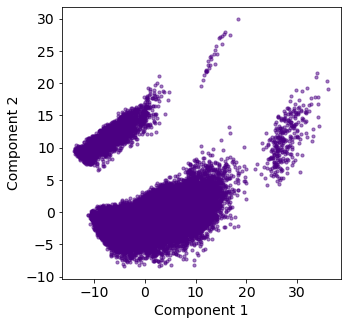

In [97]:
# plot the visualization of the data by componants
plt.figure(figsize=(5,5))
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.scatter(x=national_pca['comp_1'],
            y=national_pca['comp_2'],
            alpha=.5,
            s=10,
            color='indigo');

# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)